# AI in Enterprise Systems (AIDI 2004-02)

## Lab Assignment 4 - Heroku

#### Done by:- Abraham Mathew (100829875)

## SVM Model to predict the fish species

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset = pd.read_csv('Fish.csv')
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
#Show Key Statistics
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Class Split
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


Text(0, 0.5, 'Count')

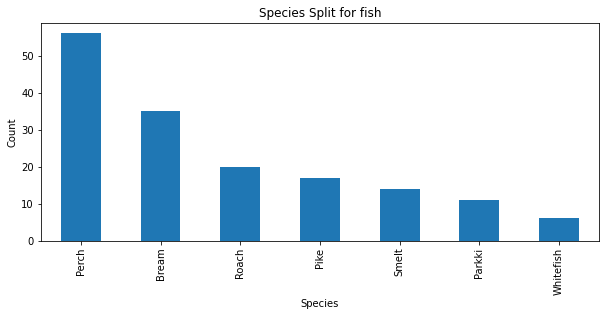

In [6]:
#Class Balance
print('Class Split')
print(dataset['Species'].value_counts())
dataset['Species'].value_counts().plot.bar(figsize=(10,4),title='Species Split for fish')
plt.xlabel('Species')
plt.ylabel('Count')

<AxesSubplot:title={'center':'Correlation Matrix'}>

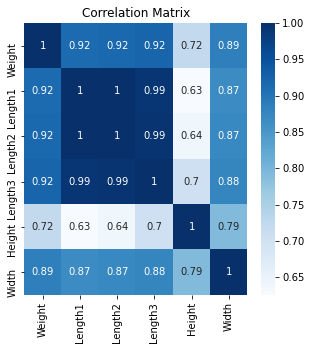

In [9]:
#Correlation Matrix
fig = plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(dataset.corr(),annot=True, cmap = 'Blues')

In [10]:
#All the length columns are highly correlated. Keep only Length 1 for the analysis

In [16]:
#Splitting Features and Target variables
X = dataset.drop(['Length2','Length3','Species'] , axis = 1)
y = dataset['Species']

In [30]:
# Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y,random_state=100)

In [34]:
#SVM Model Pipeline
#Pipeline for scaling features and then adding model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model_pipeline = Pipeline([
                  ('Scaler',StandardScaler()),
                  ('SVM',SVC())])

In [35]:
#Executing model
from sklearn.metrics import classification_report, confusion_matrix  
model_pipeline.fit(x_train,y_train)
predict = model_pipeline.predict(x_test)
print('\nEstimator: SVM') 
print(confusion_matrix(y_test,predict))  
print(classification_report(y_test,predict))  


Estimator: SVM
[[ 9  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0]
 [ 0  0 13  0  0  1  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

       Bream       0.90      1.00      0.95         9
      Parkki       1.00      0.67      0.80         3
       Perch       0.68      0.93      0.79        14
        Pike       1.00      1.00      1.00         4
       Roach       0.00      0.00      0.00         5
       Smelt       0.80      1.00      0.89         4
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.80        40
   macro avg       0.63      0.66      0.63        40
weighted avg       0.70      0.80      0.74        40



C:\Users\abrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import pickle
pickle.dump(model_pipeline,open('lab4_model.pkl','wb'))